# Introducción

El objetivo de esta práctica es mostrar al alumno las posibilidades que ofrece R para analizar datos de distintas fuentes diferentes, extraer datos, comparar, hacer gráficas y sacar estadísticos.

Las fuentes de datos que se tienen son:
* Datos meteorológicos de Praga de 1775 hasta 2004: https://www.ncdc.noaa.gov/cdo-web/datasets
* Banco mundial: https://data.worldbank.org/topic/climate-change
* Nivel de CO2 en la atmósfera (Mauna Loa): https://www.esrl.noaa.gov/gmd/ccgg/trends/data.html

Todos los ficheros necesarios para resolver la práctica se ofrecen como adjuntos.

## Datos meteorológicos NOAA

Carga el tiempo meteorológico de Praga en un data.frame. Fichero: *EZE00100082*

In [1]:
weatherPraga<-read.csv("./datos/EZE00100082.csv", sep = ",")
head(weatherPraga)

STATION,DATE,LATITUDE,LONGITUDE,ELEVATION,NAME,CDSD,CDSD_ATTRIBUTES,CLDD,CLDD_ATTRIBUTES,⋯,HTDD,HTDD_ATTRIBUTES,PRCP,PRCP_ATTRIBUTES,TAVG,TAVG_ATTRIBUTES,TMAX,TMAX_ATTRIBUTES,TMIN,TMIN_ATTRIBUTES
EZE00100082,1775,50.0906,14.4192,191,"PRAHA KLEMENTINUM, EZ",246.3,NA,246.3,E,⋯,NA,,NA,,10.55,E,13.64,E,7.46,E
EZE00100082,1776,50.0906,14.4192,191,"PRAHA KLEMENTINUM, EZ",114.6,NA,114.6,E,⋯,3481.8,E,NA,,8.53,E,11.72,E,5.34,E
EZE00100082,1777,50.0906,14.4192,191,"PRAHA KLEMENTINUM, EZ",62.6,NA,62.6,E,⋯,3628.0,E,NA,,8.67,E,11.76,E,5.58,E
EZE00100082,1778,50.0906,14.4192,191,"PRAHA KLEMENTINUM, EZ",188.4,NA,188.4,E,⋯,3330.2,E,NA,,9.91,E,13.17,E,6.65,E
EZE00100082,1779,50.0906,14.4192,191,"PRAHA KLEMENTINUM, EZ",109.5,NA,109.5,E,⋯,3216.0,E,NA,,10.23,E,13.64,E,6.82,E
EZE00100082,1780,50.0906,14.4192,191,"PRAHA KLEMENTINUM, EZ",94.5,NA,94.5,E,⋯,3344.6,E,NA,,8.64,E,11.93,E,5.34,E


Mostrar los 10 años que más precipitiaciones han tenido junto con su valor correspondiente (columna PRCP):

In [2]:
informe<-aggregate(weatherPraga$PRCP, by=list(Category=weatherPraga$DATE), FUN=sum)
colnames(informe)[colnames(informe)=="x"] <- "sumPRCP"
head(informe[order(informe$sumPRCP),],10)

,Category,sumPRCP
68,1842,255.3
229,2003,267.1
169,1943,268.7
90,1864,269.6
179,1953,291.7
52,1826,310.0
60,1834,310.3
89,1863,312.8
137,1911,326.0
159,1933,327.0


* Muestra en un diagrama de dispersión la temperatura mínima registrada en un año (columna EMNT) en función del año registrado (columna DATE).
* Crear una regresión lineal (polinomio orden 1) que muestre la tendencia. Pintarla sobre el diagrama de dispersión.
* En media, ¿Cuantos grados ha aumentado la temperatura mínima cada año? (pendiente de la  regresión lineal)


Call:
lm(formula = EMNT ~ DATE, data = weatherPraga)

Residuals:
     Min       1Q   Median       3Q      Max 
-12.6098  -4.0003   0.5335   3.2636  11.2083 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) -48.00664    9.17007  -5.235 3.74e-07 ***
DATE          0.01738    0.00485   3.582 0.000416 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 4.884 on 228 degrees of freedom
Multiple R-squared:  0.05329,	Adjusted R-squared:  0.04913 
F-statistic: 12.83 on 1 and 228 DF,  p-value: 0.0004162


[1] "En promedio la mínima ha aumentado un 1.74% anual"


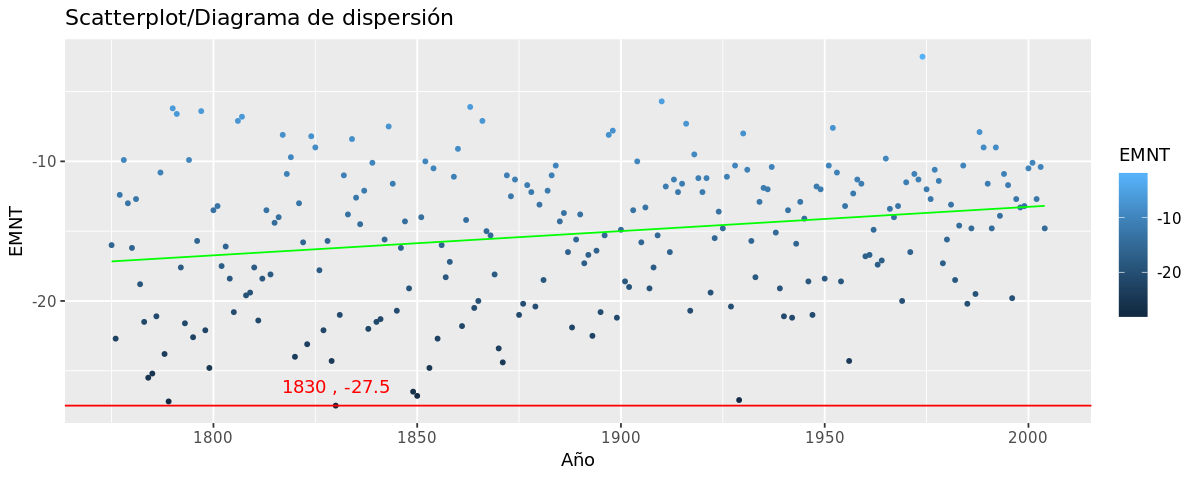

In [49]:
options(repr.plot.height=4,repr.plot.width=10)
library("ggplot2")
hline<-min(weatherPraga$EMNT)
min_year<-weatherPraga$DATE[which.min(weatherPraga$EMNT)]
model=lm(data=weatherPraga,EMNT ~ DATE)

weatherPraga$EMNTpredicted<- predict(model,weatherPraga)
summary(model)

ggplot(data=weatherPraga,aes(x=DATE,y=EMNT,color=EMNT))+geom_point(size=1)+
    xlab("Año")+ylab("EMNT")+ggtitle("Scatterplot/Diagrama de dispersión")+
    #geom_abline(intercept = min(weatherPraga$EMNT), slope = 0, color="red")+
    geom_hline(yintercept=hline,color="red")+ 
    annotate(geom="text", label=paste(min_year,",",hline), x=min_year, y=hline, vjust=-1,color="red")+
    geom_line(aes(y=EMNTpredicted),color="green")

print("En promedio la mínima ha aumentado un 1.74% anual")

¿Ha subido realmente la temperatura mínima?
* Calcula la media de la temperatura mínima (columna EMNT) del intervalo de años [1775,1794]
* Calcula la media de la temperatura mínima (columna EMNT) del intervalo de años [1985,2004]
* ¿Cual es la diferencia entre ambos? ¿Es estadísticamente significativa?
  * Nota: antes de aplicar un test estadístico hay que ver si cumple con los requisitos de ese test.

In [4]:
#obtenemos los subsets
set_7594 <- subset(weatherPraga,DATE>=1775 & DATE<=1794)$EMNT
set_8504 <- subset(weatherPraga,DATE>=1985 & DATE<=2004)$EMNT

#cálculo de medias
mean_7594 <- mean(set_7594)
mean_8504 <- mean(set_8504)
cat("\nLa media del período [1775,1794] es:",mean_7594," y la media del período [1985,2004] es:",mean_8504,"\n")

#analizamos si los grupos siguen una distribución normal con el Test de Shapiro
st_7594 <- shapiro.test(set_7594)$p.value
st_8504 <- shapiro.test(set_8504)$p.value

cat("No se rechaza H0: La temperatura mínima en el período [1775,1794] sigue una dist. normal con un pvalue:",st_7594,"\n")
cat("No se rechaza H0: La temperatura mínima en el período [1985,2004] sigue una dist. normal con un pvalue:",st_8504,"\n")

#Test de varianza Fisher
cat("Se rechaza H0: las muestras tienen igual varianza con un pvalue de:", var.test(set_7594,set_8504)$p.value,
    ".\n\nHabrá que aplicar el test de Welch debido a que las temperaturas siguen una normal con varianzas diferentes.\n")

#Test de Welch
tw <- t.test(set_7594,set_8504)
#tw
#str(tw)
       
cat("Se rechaza H0: La temperatura media de ambos períodos es igual con un pvalue:",tw$p.value,
    "y una diferencia entre:", tw$conf.int[1],"y",tw$conf.int[2])


La media del período [1775,1794] es: -16.935  y la media del período [1985,2004] es: -13.04 
No se rechaza H0: La temperatura mínima en el período [1775,1794] sigue una dist. normal con un pvalue: 0.3808261 
No se rechaza H0: La temperatura mínima en el período [1985,2004] sigue una dist. normal con un pvalue: 0.07510362 
Se rechaza H0: las muestras tienen igual varianza con un pvalue de: 0.0109964 .

Habrá que aplicar el test de Welch debido a que las temperaturas siguen una normal con varianzas diferentes.
Se rechaza H0: La temperatura media de ambos períodos es igual con un pvalue: 0.02570684 y una diferencia entre: -7.283204 y -0.5067957

## Datos banco mundial

Carga los datos del banco mundial

In [5]:
databank<-read.csv("./datos/API_19_DS2_en_csv_v2.csv",skip=4)
#Borramos las X del nombre de la columna
colnames(databank)<-gsub("X","",colnames(databank))

countryData<-read.csv("./datos/Metadata_Country_API_19_DS2_en_csv_v2.csv")

# De esta forma podremos aceder a la información de paises usando su countryCode
rownames(countryData)<-countryData$Country.Code

realCountryData<-subset(countryData,IncomeGroup!="")
regionData<-subset(countryData,IncomeGroup=="")
print(paste("Tenemos un total de",nrow(realCountryData),"paises"))
print(paste("Tenemos un total de",nrow(regionData),"regiones"))
indicators<-read.csv("./datos/Metadata_Indicator_API_19_DS2_en_csv_v2.csv")
print(paste("Tenemos un total de",nrow(indicators),"indicadores"))

[1] "Tenemos un total de 217 paises"
[1] "Tenemos un total de 46 regiones"
[1] "Tenemos un total de 80 indicadores"


¿Cual fue el país que más toneladas de CO2 equivalente emitió en 1970 (Mostrar *Country.Name*)?
¿Cuanto contaminó?

Hay una dataframe con la lista de pasises en *realCountryData*
El número de toneladas de CO2 equivalente viene dado por el Indicator.Code *"EN.ATM.GHGT.KT.CE"*


In [26]:
df<-databank[databank$Indicator.Code =="EN.ATM.GHGT.KT.CE" & databank$Country.Code %in% realCountryData$Country.Code,
             c("Country.Name","Country.Code","1970","Indicator.Code")]
df<-df[order(df$"1970",decreasing=T) ,]

print(paste("El país que más toneladas de CO2 equivalente emitió en 1970 fue: ",df[1,1], " con ", df[1,3]," toneladas."))
head(df)

[1] "El país que más toneladas de CO2 equivalente emitió en 1970 fue:  United States  con  5400503.5  toneladas."


,Country.Name,Country.Code,1970,Indicator.Code
19959,United States,USA,5400504,EN.ATM.GHGT.KT.CE
16039,Russian Federation,RUS,2240873,EN.ATM.GHGT.KT.CE
3079,China,CHN,1873972,EN.ATM.GHGT.KT.CE
3319,"Congo, Dem. Rep.",COD,1550424,EN.ATM.GHGT.KT.CE
4279,Germany,DEU,1286570,EN.ATM.GHGT.KT.CE
2199,Brazil,BRA,1260982,EN.ATM.GHGT.KT.CE


¿Cuales fueron los 5 países que más toneladas de CO2 equivalente emitieron en 2012? ¿Cuantas kt emitieron?

In [7]:
df2012<-databank[databank$Indicator.Code =="EN.ATM.GHGT.KT.CE" & databank$Country.Code %in% realCountryData$Country.Code,
             c("Country.Name","2012")]
df2012<-df2012[order(df2012$"2012",decreasing=T) ,]
head(df2012,5)

,Country.Name,2012
3079,China,12454711
19959,United States,6343841
8599,India,3002895
2199,Brazil,2989418
16039,Russian Federation,2803398


¿Cual ha sido la media del **porcentaje** de crecimiento de las emisiones de CO2 equivalente en China desde 2000 hasta 2012?

In [28]:
dfChina<- databank[databank$Indicator.Code =="EN.ATM.GHGT.KT.CE" & databank$Country.Name=="China",
         c(paste(2000:2012))]
year<-c(2000:2012)
emis<-as.numeric(unlist(dfChina))

perc<-c(NA,emis[2:length(emis)]/emis[1:(length(emis)-1)])
perc<-(perc-1)*100

percChina<-data.frame(year=year,emis=emis,perc=round(perc,4))
cat("La media del porcentaje de crecimiento de las emisiones de CO2",
            "equivalente en China desde 2000 hasta 2012 ha sido: \n",round(mean(percChina$perc,na.rm=TRUE),2),"%")

La media del porcentaje de crecimiento de las emisiones de CO2 equivalente en China desde 2000 hasta 2012 ha sido: 
 7.82 %

Compara las emisiones de CO2(kt) per cápita (clave en Indicator.Code: *EN.ATM.CO2E.PC*) de todos los paises en 1960,1990 y 2017 mediante:
* diagrama de cajas
* histograma
* curvas de densidad

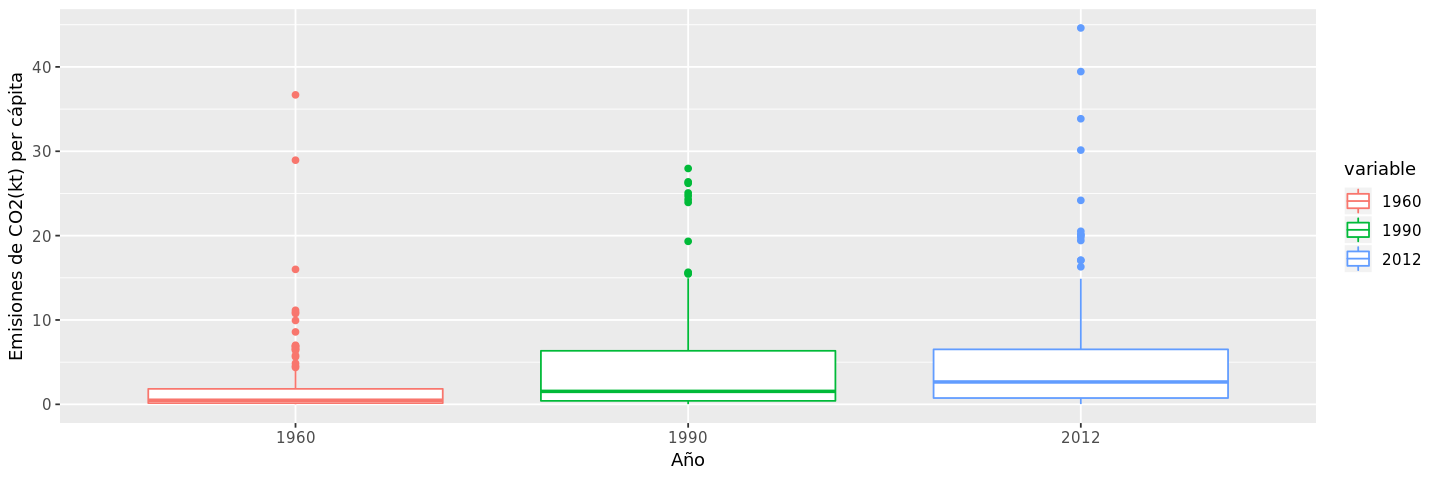

In [29]:
library("reshape2")
compemis<-databank[databank$Indicator.Code =="EN.ATM.CO2E.PC" & databank$Country.Code %in% realCountryData$Country.Code,]
compemis_melt<-melt(compemis[,c("Country.Name","1960","1990","2012")],id=c("Country.Name"), na.rm = TRUE)
ggplot(data=compemis_melt,aes(x=variable, y=value,color=variable))+geom_boxplot()+xlab("Año")+ylab("Emisiones de CO2(kt) per cápita")

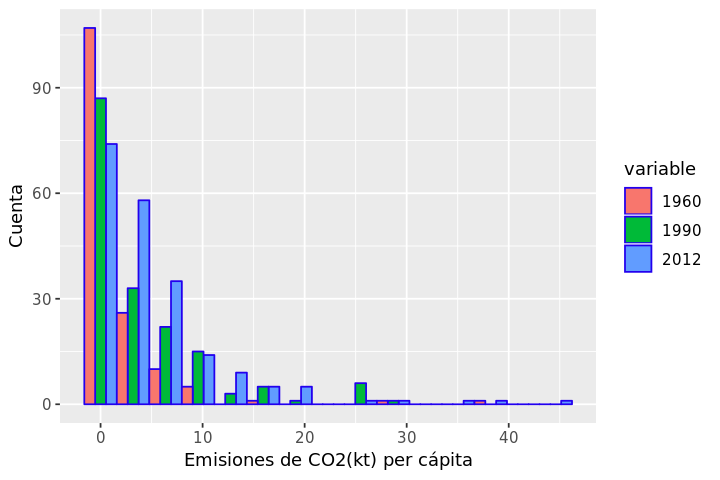

In [50]:
options(repr.plot.height=4,repr.plot.width=6)
ggplot(data=compemis_melt,aes(x=value,fill=variable))+geom_histogram(bins=15, color="#2200EE",position = "dodge")+
xlab("Emisiones de CO2(kt) per cápita")+ylab("Cuenta")

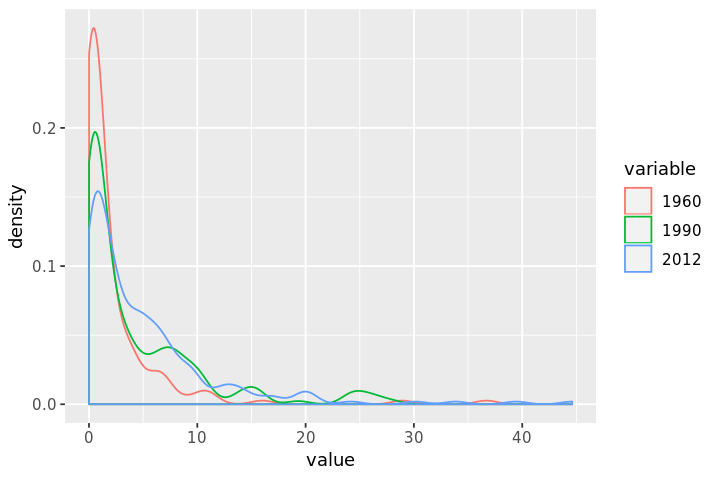

In [51]:
#Creamos la función de probabilidad, 
# la suma debería ser 1 por lo que normalizamos dividiendo entre el total de la población española
library(ggplot2)
compemis_melt$Total<-compemis_melt$value/sum(compemis_melt$value)
ggplot(data=compemis_melt, aes(x=value,colour=variable)) + geom_density(bw=1)#+ geom_vline(xintercept=3.65,color="blue")

Utilizando ggplot: Compara en una gráfica las emisiones totales de CO2 (clave en Indicator.Code: EN.ATM.CO2E.KT) en función del año de las siguientes regiones:
* Mundo entero: WLD
* Unión europea: EUU
* Africa subsahariana: SSA
* Norteamérica: NAC
* Este de Asia y pacífico: TEA

Ayuda: Tendrás que usar la función *melt()* para transformar los años, cada año en una columna, en un data.frame donde cada uno esté en una fila.

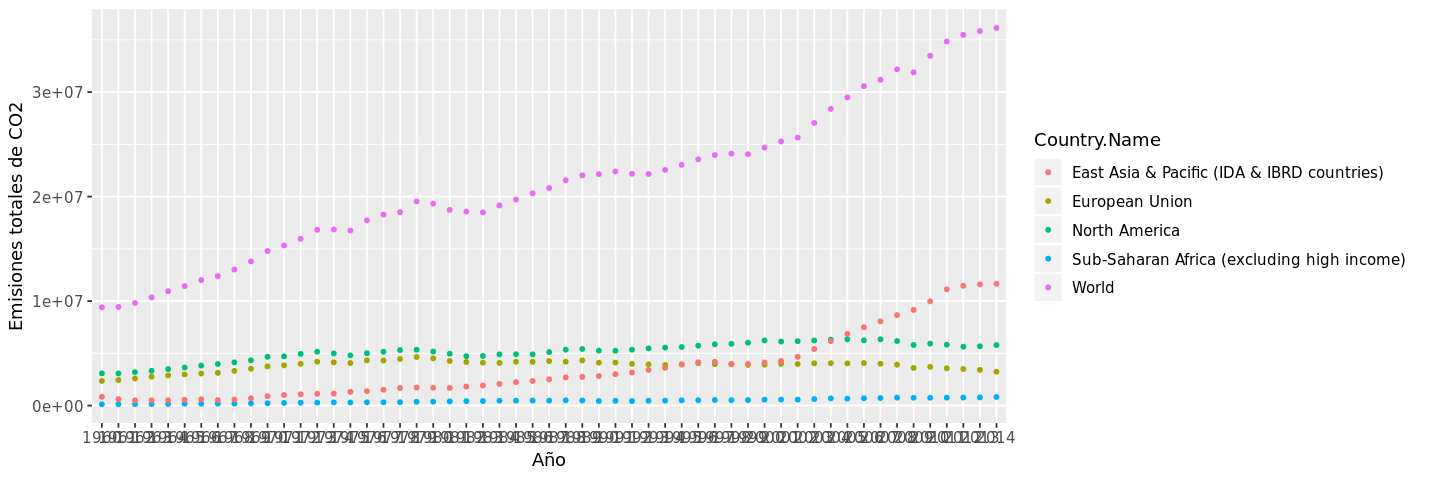

In [12]:
compemisreg<-databank[databank$Indicator.Code =="EN.ATM.CO2E.KT" & databank$Country.Code %in% c("WLD","EUU","SSA","NAC","TEA"),]
years=paste(c(1960:2017),sep='""')
compemisreg_melt<-melt(compemisreg[,c("Country.Name",years)],id=c("Country.Name"), na.rm = TRUE)
options(repr.plot.height=4,repr.plot.width=12)
ggplot(data=compemisreg_melt,aes(x=variable,y=value,color=Country.Name))+geom_point(size=1)+
#geom_histogram(bins=15, color="#2200EE",position = "dodge")+
xlab("Año")+ylab("Emisiones totales de CO2")


Suponiendo que la tendencia se mantiene, es decir, que no se aplica ninguna política a nivel global de reducción de emisiones de CO2, ¿cual sería el total de emisiones de CO2 en todo el mundo en el año 2020?

Para calcularlo utiliza tres modelos lineales:
* Regresión lineal con polinomio grado 1
* Regresión lineal polinomio grado 3
* Regresión lineal polinomio grado 10

Represénta en una gráfica el valor real y el calculado por cada uno de los 3 modelos.

Las estimaciones para el año 2020 son:

,variable,value,pol1,pol3,pol10
61,2020,NA,36077323,45926324,87325918


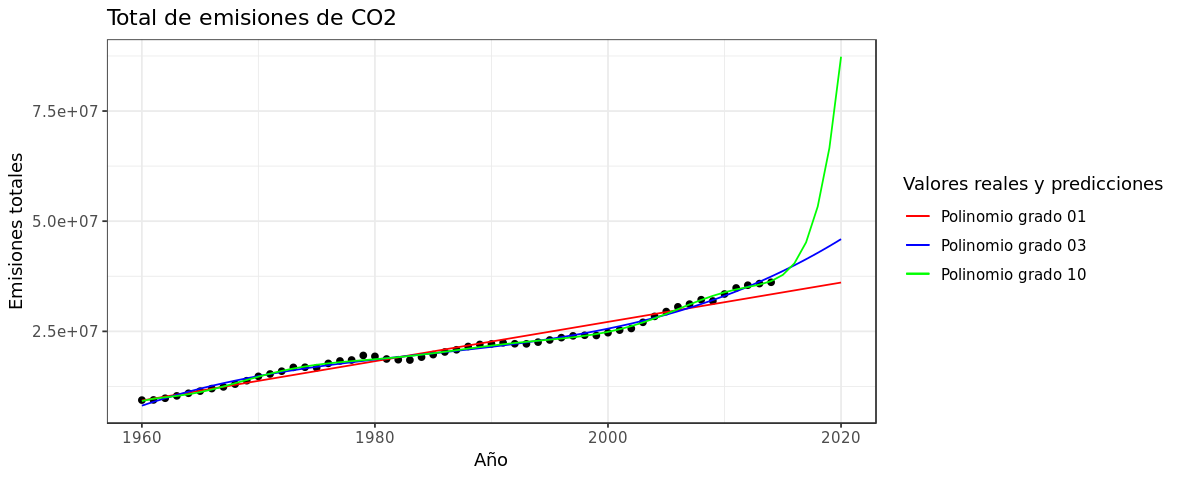

In [55]:
###Data frame del mundo
compemisreg_melt_world=compemisreg_melt[compemisreg_melt$Country.Name=="World",]
compemisreg_melt_world$variable<-as.numeric(as.character(compemisreg_melt_world$variable))
###Dataframe predicción
compemisreg_melt_world_pred<- data.frame(variable=seq(1960,2020,1),value=NA)
#tail(compemisreg_melt_world_pred)
###Modelos
model1<-lm(data=compemisreg_melt_world, value ~ variable)
model3<-lm(data=compemisreg_melt_world, value ~ poly(variable,3))
model10<-lm(data=compemisreg_melt_world, value ~ poly(variable,10))
###Predicciones
compemisreg_melt_world_pred$pol1<- predict(model1,compemisreg_melt_world_pred)
compemisreg_melt_world_pred$pol3<- predict(model3,compemisreg_melt_world_pred)
compemisreg_melt_world_pred$pol10<- predict(model10,compemisreg_melt_world_pred)

cat("Las estimaciones para el año 2020 son:")
compemisreg_melt_world_pred[compemisreg_melt_world_pred$variable==2020,]

###Gráfico
options(repr.plot.height=4,repr.plot.width=10)
ggplot(data=compemisreg_melt_world, aes(x=variable))+
    geom_point(aes(y=compemisreg_melt_world$value))+
    geom_line(data=compemisreg_melt_world_pred,aes(y=pol1,colour="Polinomio grado 01"))+
    geom_line(data=compemisreg_melt_world_pred,aes(y=pol3,color="Polinomio grado 03"))+
    geom_line(data=compemisreg_melt_world_pred,aes(y=pol10,color="Polinomio grado 10"))+
    theme_bw()+xlab("Año")+ylab("Emisiones totales")+ggtitle("Total de emisiones de CO2")+
    scale_colour_manual(name="Valores reales y predicciones",
        values=c("Polinomio grado 01"="red", "Polinomio grado 03"="blue", "Polinomio grado 10"="green"))


## Nivel de CO2

En esta parte vamos a trabajar con el nivel medio de CO2 medido por el NOAA en Manuna Loa (Hawai) desde 1968.

In [56]:
co2ppm<-read.csv("./datos/co2_mm_mlo.txt",skip=73,sep="",header = F, 
                 col.names= c("year","month","date","average","interpolated","trend","days"))

Representa el diagrama de dispersión entre:
* CO2 medido en la atmósfera (co2ppm\$interpolated)
* CO2 emitido por todos los países (databank con Indicator.Code=="EN.ATM.CO2E.KT" y Country.Code=="WLD"?

¿Cual es su correlación?


Nota: 

* Los valores en co2ppm vienen en meses, habrá que agregarlos, calcular la media anual a partir de los meses para así poder hacer la correlación con databank.
* Los valores en databank vienen en columnas, habrá que pasarlos a filas utilizando la función *melt*.

[1] "La correlación es:  0.98455784385784"


Warning message:
“Removed 5 rows containing missing values (geom_point).”

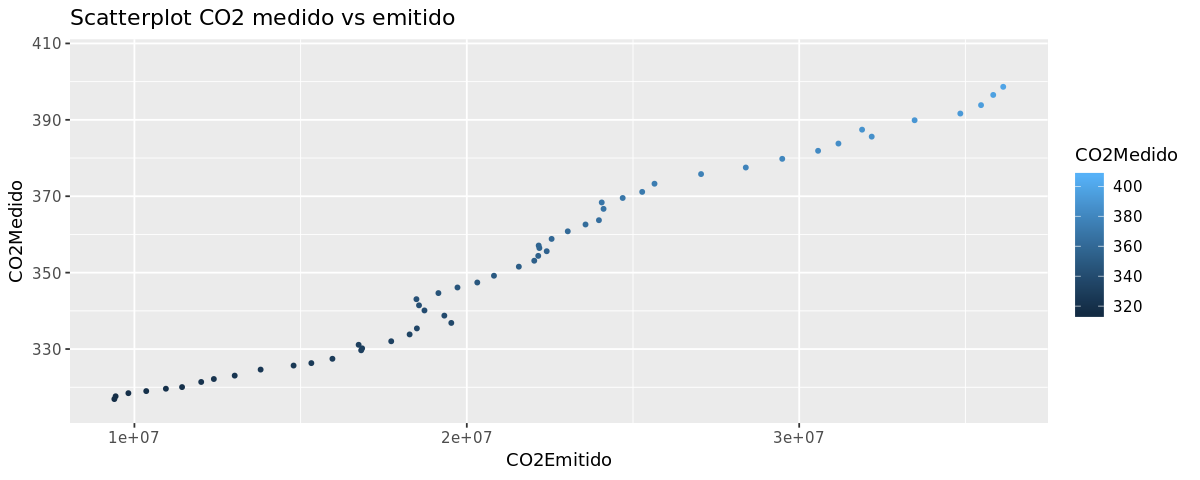

In [68]:
meanCO2<-aggregate(co2ppm$interpolated, by=list(Category=co2ppm$year), FUN=mean)
colnames(meanCO2)<-c("Año","CO2Medido")
#tail(meanCO2)
wldCO2<-databank[databank$Country.Code=="WLD" & databank$Indicator.Code=="EN.ATM.CO2E.KT",]
years=paste(c(1960:2017),sep='""')
wldCO2_melt<-melt(wldCO2[,c("Country.Name",years)],id=c("Country.Name"), na.rm = TRUE)[,c(2,3)]
colnames(wldCO2_melt)<-c("Año","CO2Emitido")
#tail(wldCO2_melt)
merged<-merge(meanCO2,wldCO2_melt,by="Año", all = TRUE)
#head(merged)
print(paste("La correlación es: ",cor(merged$CO2Medido,  y=merged$CO2Emitido, use = "complete.obs")))

ggplot(data=merged,aes(x=CO2Emitido,y=CO2Medido,color=CO2Medido))+geom_point(size=1)+
    xlab("CO2Emitido")+ylab("CO2Medido")+ggtitle("Scatterplot CO2 medido vs emitido")

Calcular la matriz de correlación de las siguientes variables:
* Cantidad de CO2 en la atmósfera
* Emisiones totales CO2 en la atmósfera
* Temperatura mínima en praga (columna EMNT).

In [63]:
minPraga<-aggregate(weatherPraga$EMNT, by=list(Category=weatherPraga$DATE), FUN=min)
colnames(minPraga)<-c("Año","tempMínima")
#tail(minPraga)
merged_matrix<-merge(merged,minPraga,by="Año", all = TRUE)
#head(merged_matrix)
cor(merged_matrix[2:4], use = "complete.obs")


,CO2Medido,CO2Emitido,tempMínima
CO2Medido,1.0000000,0.9703198,0.1783153
CO2Emitido,0.9703198,1.0000000,0.2254552
tempMínima,0.1783153,0.2254552,1.0000000
